In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv("../data/raw/posts_unstacked_fullgeo.csv")

In [3]:
df.head()

,id,title,creation_date,creation_date_parsed,modification_date,poststatus_id,combineddistricts,combinedstates,combinedtopics,description,...,testlat,testlon,testgranularity,testgeopoint,district_name,districtNameState,state,distlat,distlon,distgranularity
0,59,Praktikum im Einzelhandel - laufend Termine,2015-07-09 12:00:39,2015-07-09T12:00:39.000Z,2017-02-10 15:20:05,2,100,NaN,45,Du interessierst dich für den Einzelhandel? Bz...,...,NaN,NaN,NaN,NaN,Augsburg,Augsburg,Bayern,48.366804,10.898697,CITY
1,59,Praktikum im Einzelhandel - laufend Termine,2015-07-09 12:00:39,2015-07-09T12:00:39.000Z,2017-02-10 15:20:05,2,100,NaN,52,Du interessierst dich für den Einzelhandel? Bz...,...,NaN,NaN,NaN,NaN,Augsburg,Augsburg,Bayern,48.366804,10.898697,CITY
2,108,Fachverkäufer/-in im Lebensmittelhandwerk,2015-07-27 14:15:44,2015-07-27T14:15:44.000Z,2017-02-10 15:19:34,2,143,NaN,45,Bei der dreijährigen Ausbildung zum/-r Fachver...,...,NaN,NaN,NaN,NaN,München,München,Bayern,48.137272,11.575482,CITY
3,108,Fachverkäufer/-in im Lebensmittelhandwerk,2015-07-27 14:15:44,2015-07-27T14:15:44.000Z,2017-02-10 15:19:34,2,143,NaN,52,Bei der dreijährigen Ausbildung zum/-r Fachver...,...,NaN,NaN,NaN,NaN,München,München,Bayern,48.137272,11.575482,CITY
4,1211,Schülerpraktikum bei Hansa Klimasysteme,2015-08-17 08:07:42,2015-08-17T08:07:42.000Z,2015-08-17 08:26:01,2,223,NaN,24,Der Klimagerätehersteller HANSA bietet interes...,...,NaN,NaN,NaN,NaN,Emden,Emden,Niedersachsen,53.367044,7.205800,CITY


In [4]:
import pickle

In [6]:
urban_cities = pickle.load(open("../data/interim/urban_cities.pkl", 'rb'))

In [7]:
urban_cities

array(['Aachen', 'Amberg', 'Ansbach', 'Aschaffenburg', 'Augsburg',
       'Baden-Baden', 'Bamberg', 'Bayreuth', 'Berlin', 'Bielefeld',
       'Bochum', 'Bonn', 'Bottrop', 'Brandenburg an der Havel',
       'Braunschweig', 'Bremen', 'Bremerhaven', 'Chemnitz', 'Coburg',
       'Cottbus', 'Darmstadt', 'Delmenhorst', 'Dessau-Roßlau', 'Dortmund',
       'Dresden', 'Duisburg', 'Düsseldorf', 'Eisenach', 'Emden', 'Erfurt',
       'Erlangen', 'Essen', 'Flensburg', 'Frankenthal', 'Frankfurt',
       'Frankfurt am Main', 'Freiburg im Breisgau', 'Fürth',
       'Gelsenkirchen', 'Gera', 'Göttingen', 'Hagen', 'Halle', 'Hamburg',
       'Hamm', 'Hannover', 'Heidelberg', 'Heilbronn', 'Herne', 'Hof',
       'Ingolstadt', 'Jena', 'Kaiserslautern', 'Karlsruhe', 'Kassel',
       'Kaufbeuren', 'Kempten', 'Kiel', 'Koblenz', 'Köln', 'Krefeld',
       'Landau in der Pfalz', 'Landshut', 'Leipzig', 'Leverkusen',
       'Lübeck', 'Ludwigshafen am Rhein', 'Magdeburg', 'Mainz', 'Mannheim',
       'Memmingen', 'Mön

In [10]:
df.district_name.apply(lambda x: x in urban_cities).sum()

3638

In [53]:
df["urban"] = df.district_name.apply(lambda x: 1 if x in urban_cities else 0)
# Extra pass needed for big cities == states
df["state_is_city"] = df.state.apply(lambda x: True if x in urban_cities else False)
df.urban[df.state_is_city] = 1

/home/guzzo/anaconda3/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
rel_posts = df[["district_name", "urban"]].groupby("urban").aggregate('count')/len(df)
rel_posts

,district_name
urban,
0,0.555875
1,0.444125


In [55]:
pop_urban_rural = pickle.load(open("../data/interim/pop_urban_rural.pkl", 'rb'))
rel_webevents = pickle.load(open("../data/interim/rel_webevents.pkl", 'rb'))

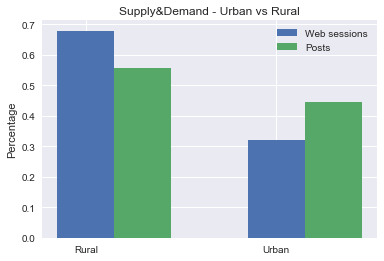

In [65]:
plt.bar((0,1), rel_webevents, width=0.3, label="Web sessions")
plt.bar((0+0.3,1+0.3), rel_posts.values, width=0.3, label="Posts")
plt.legend(loc='best')
plt.xticks([0, 1], ["Rural", "Urban"])
plt.ylabel("Percentage")
plt.title("Supply&Demand - Urban vs Rural")
plt.savefig("web_posts_urban_rural.png", dpi=300)

In [57]:
df[df.state == "Berlin"]

,id,title,creation_date,creation_date_parsed,modification_date,poststatus_id,combineddistricts,combinedstates,combinedtopics,description,...,testgeopoint,district_name,districtNameState,state,distlat,distlon,distgranularity,urban,rural,state_is_city
7,1605,Schülerpraktikum bei dem Unternehmen Berliner ...,2015-09-30 16:14:00,2015-09-30T16:14:00.000Z,2015-09-30 16:14:00,2,14,NaN,25,Bei dem Unternehmen Berliner Glas KGaA Aktieng...,...,POINT(-100.445882 39.78373),Neukölln,Neukölln,Berlin,52.481150,13.435350,NaN,1,1,True
12,1948,Schülerpraktikum bei Haustechnik Pohl,2015-09-30 16:22:57,2015-09-30T16:22:57.000Z,2015-09-30 16:22:57,2,20,NaN,24,Es besteht die Möglichkeit ein Schülerpraktiku...,...,POINT(-100.445882 39.78373),Reinickendorf,Reinickendorf,Berlin,52.604763,13.295287,NaN,1,1,True
18,2347,Schülerpraktikum bei Rhenus Logistics,2015-09-30 16:39:25,2015-09-30T16:39:25.000Z,2015-09-30 16:39:25,2,1,NaN,43,Das Unternehmen Rhenus Logistics bietet attrak...,...,POINT(-100.445882 39.78373),Mitte,Mitte,Berlin,52.517690,13.402376,NaN,1,1,True
158,1856,Schülerpraktikum in der Donnersmarck-Stiftung,2015-09-30 16:22:40,2015-09-30T16:22:40.000Z,2015-09-30 16:22:40,2,12,NaN,39,Du interessierst dich für ein Schülerpraktikum...,...,POINT(-100.445882 39.78373),Steglitz-Zehlendorf,Steglitz-Zehlendorf,Berlin,52.429205,13.229974,NaN,1,1,True
380,82,Schülerpraktikum im Hotel in Berlin,2015-07-21 10:54:56,2015-07-21T10:54:56.000Z,2016-12-01 09:53:20,2,19,NaN,21,"Frühstück: Auffüllen des Buffets, betätigen de...",...,NaN,Pankow,Pankow,Berlin,52.597811,13.436360,NaN,1,1,True
415,117,Glaser/Glaserin (Fachrichtung Verglasung/Glasbau),2015-07-29 09:19:35,2015-07-29T09:19:35.000Z,2015-07-29 13:48:46,2,20,1,24,Glas ist das Material der heutigen Architektur...,...,NaN,Reinickendorf,Reinickendorf,Berlin,52.604763,13.295287,NaN,1,1,True
417,1809,Schülerpraktikum in der Fahrradstation,2015-09-30 16:22:31,2015-09-30T16:22:31.000Z,2015-09-30 16:22:31,2,1,NaN,45,In der Fahrradstation kann ein Schülerpraktiku...,...,POINT(-100.445882 39.78373),Mitte,Mitte,Berlin,52.517690,13.402376,NaN,1,1,True
456,15181,Praktikum bei dm-drogerie markt,2016-12-09 12:11:19,2016-12-09T12:11:19.000Z,2016-12-09 12:11:19,2,39,NaN,45,Im Rahmen eines Schülerpraktikums lernen Sie d...,...,POINT(-100.445882 39.78373),Marzahn-Hellersdorf,Marzahn-Hellersdorf,Berlin,52.522523,13.587663,NaN,1,1,True
556,3205,Praktikum Organisation/Management Übernahmeop...,2015-11-11 11:54:31,2015-11-11T11:54:31.000Z,2015-11-11 12:03:09,2,1,NaN,27,In dieser Position unterstützen Sie die Geschä...,...,POINT(-100.445882 39.78373),Mitte,Mitte,Berlin,52.517690,13.402376,NaN,1,1,True
656,15080,Schülerpraktikum bei anlip consulting,2016-11-29 09:39:52,2016-11-29T09:39:52.000Z,2016-11-29 10:22:32,2,20,NaN,32,NaN,...,NaN,Reinickendorf,Reinickendorf,Berlin,52.604763,13.295287,NaN,1,1,True


In [58]:
df["rural"] = df["urban"].apply(lambda x: 0 if x else 1)
group_states = df[["district_name", "urban", "state", "rural"]].groupby("state").aggregate('sum')

In [59]:
group_states["total"] = group_states.urban+group_states.rural
group_states.rural = group_states.rural/group_states.total
group_states.urban = group_states.urban/group_states.total
group_states

,urban,rural,total
state,,,
Baden-Württemberg,0.456897,0.543103,232
Bayern,0.416277,0.583723,7053
Berlin,1.000000,0.000000,169
Brandenburg,0.274194,0.725806,62
Bremen,1.000000,0.000000,12
Hamburg,1.000000,0.000000,49
Hessen,0.407643,0.592357,157
Mecklenburg-Vorpommern,0.675676,0.324324,37
Niedersachsen,0.344828,0.655172,174


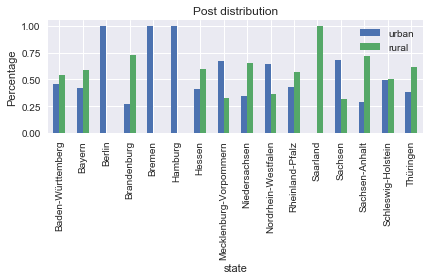

In [82]:
group_states[["urban", "rural"]].plot.bar()
plt.title("Post distribution")
plt.ylabel("Percentage")
# plt.xticks(rotation=60)
# plt.margins(1,1, tight=False)
plt.tight_layout()
plt.savefig("post_urban_rural_state.png", dpi=300)